<a href="https://colab.research.google.com/github/fholken/curso_agentes_ai/blob/main/8_Chatbot_RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

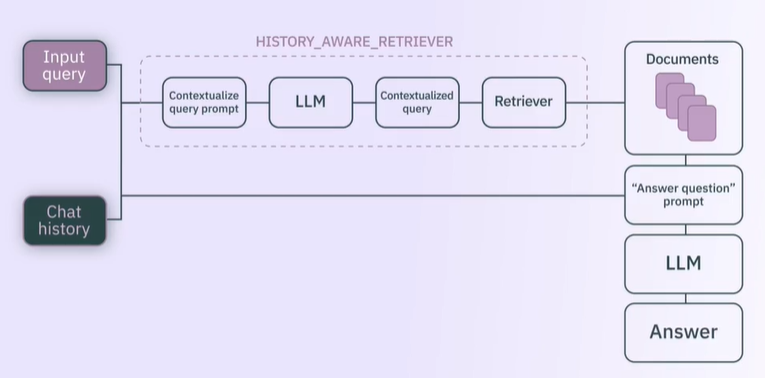

In [1]:
import getpass
import os

if "OPENAI_API_KEY" not in os.environ:
    os.environ["OPENAI_API_KEY"] = getpass.getpass("OpenAI API Key: ")

OpenAI API Key: ¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑


In [2]:
!pip install -qU langchain langchain_community unstructured langchain_openai

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 981.5/981.5 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.4/2.4 MB 39.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.7/1.7 MB 39.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 50.4/50.4 kB 2.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.1/3.1 MB 36.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.2/1.2 MB 30.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚

In [3]:
!pip install -qU pypdf

* Importamos las librerias necesarias para cargar los documentos





In [4]:
from langchain_community.document_loaders import DirectoryLoader, PyPDFLoader

* Cargamos los documentos desde google Drive, en una variable **loader**

In [6]:
loader = DirectoryLoader(
    "/content/drive/MyDrive/Colab Notebooks/curso agentes ai/PDFs",
    glob="**/*.pdf",
    loader_cls=PyPDFLoader
    )

* los guardamos en la variable **pages**

In [7]:
pages = loader.load()

* con esto podemos ver los documentos guardados

In [8]:
pages

[Document(metadata={'source': '/content/drive/MyDrive/Colab Notebooks/curso agentes ai/PDFs/-Epistemologia-y-Pedagogia-Jose-i-Bedoya.pdf', 'page': 0}, page_content=''),
 Document(metadata={'source': '/content/drive/MyDrive/Colab Notebooks/curso agentes ai/PDFs/-Epistemologia-y-Pedagogia-Jose-i-Bedoya.pdf', 'page': 1}, page_content=''),
 Document(metadata={'source': '/content/drive/MyDrive/Colab Notebooks/curso agentes ai/PDFs/-Epistemologia-y-Pedagogia-Jose-i-Bedoya.pdf', 'page': 2}, page_content=''),
 Document(metadata={'source': '/content/drive/MyDrive/Colab Notebooks/curso agentes ai/PDFs/-Epistemologia-y-Pedagogia-Jose-i-Bedoya.pdf', 'page': 3}, page_content=''),
 Document(metadata={'source': '/content/drive/MyDrive/Colab Notebooks/curso agentes ai/PDFs/-Epistemologia-y-Pedagogia-Jose-i-Bedoya.pdf', 'page': 4}, page_content=''),
 Document(metadata={'source': '/content/drive/MyDrive/Colab Notebooks/curso agentes ai/PDFs/-Epistemologia-y-Pedagogia-Jose-i-Bedoya.pdf', 'page': 5}, page

* Tenemos que dividir los PDFs en fragmentos (chunk) mas peque√±os

In [9]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1000,
    chunk_overlap = 200
)

splits = text_splitter.split_documents(pages)

* Vemos como quedaron divididos los datos

In [10]:
splits

[Document(metadata={'source': '/content/drive/MyDrive/Colab Notebooks/curso agentes ai/PDFs/guia de laboratorio PH.pdf', 'page': 0}, page_content='ESCUELANORMALSUPERIORANTIOQUE√ëA Noveno\nCIENCIAEINNOVACI√ìNGU√çADELABORATORIO\nINDICADORESDEpH\n1.OBJETIVOS 1.1. Determina la acidez y la basicidad de compuestos dados, de manera cualitativa (colorimetr√≠a) y cuantitativa (escala de pH). 1.2.Objetivos Espec√≠ficos: a. Conocer la t√©cnica para preparar un indicador casero. b. Comprender e identificar la utilidad de la determinaci√≥n del nivel de pH de diferentes sustancias. c. Identificar el pH de sustancias dom√©sticas para reconocer el nivel de acidez y basicidad de las mismas. \n 2.MARCO CONCEPTUAL:'),
 Document(metadata={'source': '/content/drive/MyDrive/Colab Notebooks/curso agentes ai/PDFs/guia de laboratorio PH.pdf', 'page': 0}, page_content='2.MARCO CONCEPTUAL: \n √ÅCIDOS Y BASES : Son dos tipos de compuestos qu√≠micos que presentan caracter√≠sticas opuestas. Los √°cidos tienen un sa

In [11]:
splits[1]

Document(metadata={'source': '/content/drive/MyDrive/Colab Notebooks/curso agentes ai/PDFs/guia de laboratorio PH.pdf', 'page': 0}, page_content='2.MARCO CONCEPTUAL: \n √ÅCIDOS Y BASES : Son dos tipos de compuestos qu√≠micos que presentan caracter√≠sticas opuestas. Los √°cidos tienen un sabor agrio, colorean de rojo el tornasol (tinte rosa que se obtiene de determinados l√≠quenes) y reaccionan con ciertos metales desprendiendo hidr√≥geno. Las bases tienen sabor amargo, colorean el tornasol de azul y tienen tacto jabonoso. Cuando se combina una disoluci√≥n acuosa de un √°cido con otra de una base, tiene lugar una reacci√≥n de neutralizaci√≥n. Esta reacci√≥n en la que, generalmente, se forman agua y sal, es muy r√°pida. As√≠, el √°cido sulf√∫rico y el hidr√≥xido de sodio NaOH, producen agua y sulfato de sodio: \n H2SO4 + 2NaOH ‚Äî------- 2H2O + Na2SO4')

En este momento **Langchain** ya tiene los documentos cargados y separados en peque√±os chunk de 1000 tokens, el paso a seguir es con la vectorizacion de estos datos. Es decir, cada uno de los chunk lo debemos llevar a una **vector independiente**, y despues llevarlo a un **espacio vectoria** o una **base de datos vectorial**

* Instalamos chroma "Esta es nuestra basa de datos vectorial"

In [12]:
!pip install -qU langchain_chroma

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 67.3/67.3 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 615.5/615.5 kB 12.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.4/2.4 MB 51.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 94.9/94.9 kB 5.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 273.8/273.8 kB 15.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

1. Estamos llamando un modelo para vectorizar (**Vamos en este paso**)
2. Llamamos un modelo para la respuesta

In [13]:
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings

# Lamacenamos los documentos en la DB
vectorstores = Chroma.from_documents(
    documents = splits,
    embedding = OpenAIEmbeddings()
)

# Convertimos a un recuperador de informaci√≥n

El **"retriever"** es un componente clave en sistemas de generaci√≥n de texto como los que se utilizan en los chatbots RAG. Su funci√≥n principal es recuperar informaci√≥n relevante de un espacio vectorial donde se almacena documentaci√≥n previamente cargada. Esto permite que el modelo busque respuestas contextuales basadas en las preguntas del usuario, utilizando fragmentos de texto (chunks) que han sido vectorizados. En el contexto de LangChain, el retriever facilita la conexi√≥n entre el modelo de lenguaje y los datos relevantes almacenados.

1. as_retriever: Esto convierte el almacenamiento de vectores en algo que puede "buscar" informaci√≥n relevante. Por ejemplo:

* Cuando le haces una pregunta, este recuperador buscar√° en los documentos almacenados y encontrar√° aquellos m√°s relacionados con tu consulta.
* Es como un motor de b√∫squeda que entiende el significado del texto.

2. retriever: Es el objeto que usaremos para buscar informaci√≥n entre los documentos.

In [14]:
retriever = vectorstores.as_retriever()

* Pasaremos la informacion del system_promt: que es **rol** que queremos que tome o actue este modelo
* Tambien le pasaremos el **contexto** en un variable, este contexto se toma de los vectores que ya tenemos en la base de datos

In [15]:
system_promt = (
    'Eres un asistente que devuelve informacion de multiples PDFs, ademas incluye emojis a cada una de las respuestas. Tienes el siguiente {context}'
)

1. Estamos llamando un modelo para vectorizar
2. Llamamos un modelo para la respuesta (Vamos en este paso)

In [16]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    model = 'gpt-4o',
    temperature = 0,
    max_tokens = 150
)

Ahora vamos a importar lo necesario:

* **ChatPromptTemplate**: Para pasarle nueva informacion al modelo
* **MessagesPlaceholder**: Para recibir inputs

In [17]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

# Esto es para manejar todo el historial
from langchain.chains import create_history_aware_retriever, create_retrieval_chain

El prop√≥sito del prompt contextualizado que mencionas es establecer un conjunto de reglas claras para un sistema de inteligencia artificial (como un chatbot) sobre c√≥mo debe comportarse al generar respuestas.

In [18]:
contextualize_q_system_prompt = (
    "Responde √∫nicamente usando la informaci√≥n proporcionada por la base de datos vectorial, "
    "el historial de chat y la √∫ltima pregunta del usuario. "
    "Si no encuentras informaci√≥n relevante en estas fuentes, responde con: "
    "'No tengo suficiente informaci√≥n para responder a tu pregunta'. "
    "Mant√©n un tono profesional en tus respuestas."
)

# ¬øQu√© es contextualize_q_prompt?

contextualize_q_prompt es una plantilla de mensaje (prompt) para un modelo de inteligencia artificial, como GPT. Define c√≥mo se estructura la entrada que se enviar√° al modelo para que genere una respuesta. En este caso, est√° construida usando ChatPromptTemplate.from_messages.

# Desglose del c√≥digo

a. **ChatPromptTemplate.from_messages**

Este m√©todo crea un **prompt compuesto por m√∫ltiples mensajes**. Cada mensaje tiene un rol (por ejemplo, system, human) y un contenido espec√≠fico.

En este caso, la entrada al modelo est√° compuesta por tres elementos:

  1. Un mensaje del sistema (system).
  2. Un historial de chat (MessagesPlaceholder).
  3. La √∫ltima entrada del usuario (human).

b. **Mensaje del sistema**

```
('system', contextualize_q_system_prompt)
```

  * Rol ('system'): El mensaje del sistema es una instrucci√≥n fija que le dice al modelo c√≥mo debe comportarse.
  * Contenido (contextualize_q_system_prompt): Este contiene las reglas definidas previamente, como:
    * Responder solo seg√∫n el historial de chat, la base de datos y la √∫ltima pregunta.
    * Mantener un tono profesional.
    * No inventar informaci√≥n fuera del contexto.

Ejemplo de mensaje del sistema:



```
Responde √∫nicamente usando la informaci√≥n proporcionada por la base de datos vectorial, el historial de chat y la √∫ltima pregunta del usuario. Si no encuentras informaci√≥n relevante en estas fuentes, responde con: "No tengo suficiente informaci√≥n para responder a tu pregunta". Mant√©n un tono profesional en tus respuestas.
```

c. **Historial del chat**

```
MessagesPlaceholder('chat_history')
```

  * MessagesPlaceholder: Es un marcador que se reemplazar√° din√°micamente con el historial de mensajes de la conversaci√≥n.
  * Prop√≥sito: Permite al modelo conocer lo que ya se ha discutido en la conversaci√≥n para dar respuestas contextuales.

Por ejemplo, si el historial contiene:

```
Usuario: ¬øQu√© es un vector?
Asistente: Es una estructura matem√°tica utilizada para representar magnitudes y direcciones.
```

El modelo tendr√° esta informaci√≥n para generar respuestas m√°s relevantes.

d. **Entrada del usuario**

```
('human', '{input}')
```

  * Rol ('human'): Representa la pregunta o mensaje m√°s reciente del usuario.
  * Contenido ('{input}'): Un marcador de posici√≥n que se reemplazar√° con el texto actual del usuario.

Ejemplo: Si el usuario pregunta:

```
¬øPuedes explicar c√≥mo calcular un vector unitario?
```

El valor de {input} ser√°:

```
¬øPuedes explicar c√≥mo calcular un vector unitario?
```

## Ejemplo completo en acci√≥n

Supongamos que tenemos:

  * Mensaje del sistema:

```
Responde √∫nicamente usando la informaci√≥n proporcionada por la base de datos vectorial, el historial de chat y la √∫ltima pregunta del usuario.
```
  * Historial de chat:

```
Usuario: ¬øQu√© es un vector?
Asistente: Es una estructura matem√°tica utilizada para representar magnitudes y direcciones.
```

  * √öltima pregunta del usuario:

```
¬øPuedes explicar c√≥mo calcular un vector unitario?
```

El prompt que recibe el modelo ser√° algo como:

```
System: Responde √∫nicamente usando la informaci√≥n proporcionada por la base de datos vectorial, el historial de chat y la √∫ltima pregunta del usuario.
Chat History:
Usuario: ¬øQu√© es un vector?
Asistente: Es una estructura matem√°tica utilizada para representar magnitudes y direcciones.
Human: ¬øPuedes explicar c√≥mo calcular un vector unitario?
Esto asegura que el modelo tenga toda la informaci√≥n relevante para responder correctamente.
```

In [20]:
contextualize_q_prompt = ChatPromptTemplate.from_messages(
    [
        (
            'system', contextualize_q_system_prompt
        ),
        MessagesPlaceholder('chat_history'),
        ('human', '{input}')
    ]
)


# Importaciones


```
from langchain.chains import create_history_aware_retriever, create_retrieval_chain
```

* **create_history_aware_retriever:**
Es una funci√≥n de la librer√≠a LangChain que se utiliza para crear un objeto de recuperaci√≥n de informaci√≥n (retriever) que:

  * Tiene en cuenta el historial de la conversaci√≥n.
  * Utiliza un modelo de lenguaje (LLM, por sus siglas en ingl√©s) para recuperar informaci√≥n m√°s relevante de una base de datos vectorial.

* **create_retrieval_chain:**
Es otra funci√≥n de LangChain que crea una cadena de recuperaci√≥n completa. Una cadena de recuperaci√≥n:

  * Integra el sistema de recuperaci√≥n de documentos con un modelo de lenguaje.
  * Se usa para responder preguntas de manera contextual bas√°ndose en datos previamente indexados.

# Creaci√≥n del history_aware_retriever

```
history_aware_retriever = create_history_aware_retriever(
    llm, retriever, contextualize_q_prompt
)
```

Este fragmento crea un retriever contextual que tiene en cuenta el historial de la conversaci√≥n. Vamos a desglosarlo:

## Componentes de entrada

  1. llm **(Language Model):**

    * Este es el modelo de lenguaje que se utiliza para interpretar las preguntas y sugerir qu√© informaci√≥n es m√°s relevante.
    * Por ejemplo: OpenAI, GPT-4, o cualquier modelo compatible con LangChain.
  2. retriever:

    * Es el objeto encargado de buscar documentos relevantes en la base de datos vectorial.
    * Funciona recuperando los documentos m√°s similares a la consulta del usuario mediante embeddings.
    * Este podr√≠a ser el Chroma que configuraste anteriormente:
```
retriever = vectorstores.as_retriever()
```

  3. contextualize_q_prompt:

    * Es el prompt que define las reglas para c√≥mo se debe contextualizar la pregunta del usuario.
    * Le dice al sistema que use:
      * El historial de chat.
      * Los documentos relevantes de la base de datos.
      * La √∫ltima pregunta del usuario.
    * Esto asegura que las respuestas sean contextualmente precisas.


---

# Qu√© hace create_history_aware_retriever
* Combina el modelo de lenguaje (llm), el sistema de recuperaci√≥n (retriever) y el prompt (contextualize_q_prompt) para crear un retriever que respeta el historial de la conversaci√≥n.

* Este history_aware_retriever:
  1. Recupera documentos relevantes de la base de datos vectorial usando el retriever.
  2. Integra el historial de chat en el contexto para mejorar la precisi√≥n de las respuestas.
  3. Usa el LLM para interpretar las consultas con mayor profundidad, aplicando las instrucciones del prompt.

---

# Ejemplo del flujo
Supongamos que el usuario pregunta:


    "¬øQu√© es el aprendizaje autom√°tico?"

1. Consulta inicial:

  * El history_aware_retriever analiza la pregunta del usuario.
  * Usa el historial de chat para considerar las interacciones previas.

2. B√∫squeda en la base de datos vectorial:

  * Utiliza el retriever para buscar documentos relacionados en la base de datos vectorial (almacenada con Chroma).

3. Contextualizaci√≥n de la consulta:

  * Combina la informaci√≥n recuperada, el historial de chat, y la pregunta actual.
  * Aplica las instrucciones definidas en contextualize_q_prompt.

4. Respuesta precisa:

  * Devuelve los documentos relevantes al modelo (llm), que genera una respuesta profesional basada en las instrucciones del prompt.

In [21]:
history_aware_retriever = create_history_aware_retriever(
    llm, retriever, contextualize_q_prompt
)

# Importaci√≥n


```
from langchain.chains.combine_documents import create_stuff_documents_chain
```

Esta l√≠nea importa la funci√≥n create_stuff_documents_chain de LangChain. Esta funci√≥n se utiliza para crear una cadena (chain) que:

* Combina m√∫ltiples documentos en un solo contexto.
* Usa un modelo de lenguaje (LLM) para responder preguntas bas√°ndose en esos documentos.

En otras palabras, esta cadena permite tomar una lista de documentos recuperados (por ejemplo, desde un vectorstore), procesarlos juntos, y generar una respuesta contextualizada.

In [22]:
from langchain.chains.combine_documents import create_stuff_documents_chain

# Creaci√≥n del qa_prompt

Este bloque define el prompt para la cadena de preguntas y respuestas (question_answer_chain). Veamos cada parte:

#### ('system', system_prompt)
* Este es el mensaje inicial del sistema. Define el comportamiento del modelo y le da instrucciones espec√≠ficas.

* Ejemplo:



```
system_prompt = "Responde bas√°ndote √∫nicamente en los documentos proporcionados. S√© conciso y profesional."
```

#### MessagesPlaceholder('chat_history')

* Inserta un espacio din√°mico para el historial de chat entre el usuario y el asistente.
* Esto asegura que el modelo tenga acceso al contexto completo de la conversaci√≥n anterior.

#### ('human', '{input}')

* Representa el mensaje actual del usuario, que se pasa din√°micamente al prompt.
* El marcador {input} se reemplazar√° con la pregunta o entrada espec√≠fica del usuario.

##Ejemplo del qa_prompt completo:

Supongamos que:

* system_prompt dice: "Responde bas√°ndote √∫nicamente en los documentos."
* Historial de chat:
    * Usuario: "¬øQu√© es el aprendizaje autom√°tico?"
    * Asistente: "Es una sub√°rea de la inteligencia artificial..."
* Entrada actual: "¬øCu√°les son los beneficios?"

El prompt resultante ser√≠a algo as√≠:

```
[system] Responde bas√°ndote √∫nicamente en los documentos.
[chat_history]
- Usuario: ¬øQu√© es el aprendizaje autom√°tico?
- Asistente: Es una sub√°rea de la inteligencia artificial...
[human] ¬øCu√°les son los beneficios?
```



In [23]:
qa_prompt = ChatPromptTemplate.from_messages(
    [
        ('system', system_promt),
        MessagesPlaceholder('chat_history'),
        ('human', '{input}')
    ]
)

# Creaci√≥n de la cadena de preguntas y respuestas

## ¬øQu√© hace create_stuff_documents_chain?
* Combina documentos: Toma m√∫ltiples documentos (recuperados previamente, por ejemplo, desde un vectorstore) y los presenta al modelo como un solo "bloque de informaci√≥n".
* Genera respuestas: Utiliza el modelo de lenguaje (llm) para generar respuestas basadas en esos documentos y en el prompt proporcionado (qa_prompt).

In [24]:
question_answer_chain = create_stuff_documents_chain(
    llm,
    qa_prompt
)

# ¬øQu√© es RAG (Retrieval-Augmented Generation)?

**RAG** es un enfoque donde:

1. Se recupera informaci√≥n relevante desde una base de datos o √≠ndice vectorial (usando un retriever).
2. Esa informaci√≥n recuperada se combina con un modelo de lenguaje (LLM) para **generar respuestas contextualizadas.**

En este caso, la l√≠nea que defines implementa este flujo combinando dos elementos principales:

* Un retriever que tiene en cuenta el historial de la conversaci√≥n.
* Una cadena de generaci√≥n de respuestas.

# La funci√≥n create_retrieval_chain

Esta funci√≥n crea una **cadena completa de recuperaci√≥n y generaci√≥n de respuestas**, donde:

1. history_aware_retriever:

  * Recupera documentos relevantes desde una base de datos vectorial.
  * Tiene en cuenta el historial de la conversaci√≥n para contextualizar mejor la b√∫squeda.

2. question_answer_chain:

  * Combina los documentos recuperados y la entrada del usuario.
  * Usa un modelo de lenguaje (LLM) para generar una respuesta basada en los documentos.

El resultado es una **cadena** (rag_chain) que ejecuta ambos pasos de manera integrada.

In [25]:
rag_chain = create_retrieval_chain(
    history_aware_retriever,
    question_answer_chain
)

# Importaciones

Estas l√≠neas importan las clases necesarias para gestionar el historial de mensajes de chat y combinarlas con el flujo de trabajo de RAG:

* **BaseChatMessageHistory**: Esta es una clase base que representa el historial de mensajes de un chat.
* **RunnableWithMessageHistory**: Una clase que combina una cadena (chain) de procesamiento (en este caso, rag_chain) con el historial de mensajes. Es decir, gestiona tanto el flujo de datos como el contexto de la conversaci√≥n.
* **ChatMessageHistory**: Una implementaci√≥n espec√≠fica de BaseChatMessageHistory que proporciona funcionalidad concreta para almacenar y recuperar mensajes de un chat.

# Variable store

Aqu√≠, store es un diccionario vac√≠o que almacenar√° el historial de los mensajes de cada sesi√≥n. El √≠ndice de este diccionario es el session_id, que se utilizar√° para asociar y recuperar el historial de chat de sesiones espec√≠ficas.

# Funci√≥n get_session_history

Esta funci√≥n tiene como objetivo obtener el historial de mensajes de una sesi√≥n espec√≠fica, identificada por session_id.

1. Verifica si el session_id ya est√° en store: Si no existe, crea una nueva instancia de ChatMessageHistory y la almacena en el diccionario store bajo la clave session_id.
2. Devuelve el historial: La funci√≥n siempre devuelve el historial de mensajes correspondiente al session_id. Si no exist√≠a antes, crea uno nuevo, de lo contrario, lo recupera.

**¬øQu√© es ChatMessageHistory?** ChatMessageHistory es una implementaci√≥n que permite almacenar los mensajes de un chat de manera ordenada y persistente. Cada vez que el usuario env√≠e un nuevo mensaje, se a√±adir√° al historial.

In [26]:
from langchain_core.chat_history import BaseChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain_community.chat_message_histories import ChatMessageHistory

store = {}

def get_session_history(session_id: str) -> BaseChatMessageHistory:
    if session_id not in store:
        store[session_id] = ChatMessageHistory()
    return store[session_id]

# Creaci√≥n de conversational_rag_chain

Aqu√≠ se est√° creando una instancia de RunnableWithMessageHistory. Vamos a ver qu√© hace:

* rag_chain: Este es el flujograma de recuperaci√≥n y generaci√≥n de respuestas (RAG), que combina la recuperaci√≥n de documentos con un modelo generador de respuestas. Ya hemos visto c√≥mo funciona anteriormente.

* get_session_history: Es la funci√≥n que obtiene el historial de chat para una sesi√≥n espec√≠fica. Se utiliza para asegurar que el contexto de la conversaci√≥n est√© disponible para generar respuestas m√°s precisas y coherentes.

* **Par√°metros de claves:**

    * input_messages_key='input': La clave para acceder a los mensajes de entrada del usuario. Esto indica que cuando se pase la entrada al rag_chain, se usar√° la clave 'input' para obtener el mensaje.
    * history_messages_key='chat_history': La clave para acceder al historial de mensajes, que ser√° utilizado por el modelo para generar respuestas basadas en el contexto anterior de la conversaci√≥n.
    * output_messages_key='answer': La clave para acceder a la respuesta generada por el modelo. Cuando el modelo genere la respuesta, ser√° almacenada bajo esta clave.

In [27]:
conversational_rag_chain = RunnableWithMessageHistory(
    rag_chain,
    get_session_history,
    input_messages_key='input',
    history_messages_key='chat_history',
    output_messages_key='answer'
)

In [28]:
conversational_rag_chain.invoke(
    {
        'input': 'Cuales son los estados de la materia?'
    },
    config={
        'configurable': {
            'session_id': 'abc123'
        }
    }
)['answer']

'Los estados de la materia son tres: s√≥lido, l√≠quido y gas. üåü En este experimento, el acetato de sodio cambia de un estado l√≠quido a s√≥lido de manera instant√°nea, lo que lo hace muy interesante y divertido de observar. üß™‚ú®'

In [29]:
conversational_rag_chain.invoke(
    {
        'input': 'Cual es el estado actual de la pedagogia en nuestro medio?'
    },
    config={
        'configurable': {
            'session_id': 'abc123'
        }
    }
)['answer']

'El estado actual de la pedagog√≠a en nuestro medio se caracteriza por una serie de tendencias y desaf√≠os que reflejan la evoluci√≥n de la educaci√≥n en respuesta a las necesidades contempor√°neas. üìö‚ú®\n\n1. **Integraci√≥n Tecnol√≥gica**: La tecnolog√≠a se ha convertido en una herramienta esencial en la educaci√≥n, facilitando el aprendizaje a trav√©s de plataformas digitales, recursos en l√≠nea y aulas virtuales. üíªüåê\n\n2. **Enfoque en Competencias**: Se est√° moviendo hacia un enfoque basado en competencias, donde se prioriza el desarrollo de habilidades pr√°cticas y aplicables en lugar de solo la memorizaci√≥n de contenidos. üß†üîß\n\n3. **Educaci√≥n Inclusiva**: Hay un creciente √©nf'

In [30]:
conversational_rag_chain.invoke(
    {
        'input': '¬øComo se mide el Ph en el agua?'
    },
    config={
        'configurable': {
            'session_id': 'abc123'
        }
    }
)['answer']

'El pH del agua se puede medir de varias maneras, cada una con su propio nivel de precisi√≥n y facilidad de uso. Aqu√≠ te presento algunas de las m√°s comunes: üíßüîç\n\n1. **Papel Tornasol**: Es una forma sencilla y r√°pida de medir el pH. Simplemente sumerges una tira de papel tornasol en el agua y observas el cambio de color. El color resultante se compara con una escala de colores para determinar el pH. üåàüìÑ\n\n2. **Medidores de pH Digitales**: Estos dispositivos electr√≥nicos proporcionan una lectura precisa del pH. Solo necesitas sumergir el electrodo en el agua y el medidor mostrar√° el valor del pH'

In [31]:
conversational_rag_chain.invoke(
    {
        'input': '¬øEn que a√±o murio simon bolivar?'
    },
    config={
        'configurable': {
            'session_id': 'abc123'
        }
    }
)['answer']

'Sim√≥n Bol√≠var, el libertador de Am√©rica, falleci√≥ el 17 de diciembre de 1830. üóìÔ∏èüáªüá™ Su legado sigue siendo una parte fundamental de la historia de Am√©rica Latina. üåü'

In [32]:
conversational_rag_chain.invoke(
    {
        'input': '¬øCuales son las diferencia o mejoras que tiene laravel 11 frente a laravel 10?'
    },
    config={
        'configurable': {
            'session_id': 'abc123'
        }
    }
)['answer']

'Laravel 11 a√∫n no ha sido lanzado, por lo que no hay detalles oficiales sobre las diferencias o mejoras espec√≠ficas en comparaci√≥n con Laravel 10. Sin embargo, Laravel, como framework, suele introducir mejoras en rendimiento, nuevas caracter√≠sticas, y actualizaciones de seguridad con cada nueva versi√≥n. üöÄüîß\n\nPara estar al tanto de las novedades, te recomendar√≠a seguir el blog oficial de Laravel o su repositorio en GitHub, donde se publican las actualizaciones y cambios una vez que una nueva versi√≥n est√° disponible. üì¢üìò\n\nSi tienes alguna otra pregunta o necesitas informaci√≥n sobre versiones anteriores, ¬°estar√© encantado de ayudarte! üòä'

In [33]:
conversational_rag_chain.invoke(
    {
        'input': '¬øPorque es necesario hacer uso de la epistemolog√≠a dentro de la pedagog√≠a?'
    },
    config={
        'configurable': {
            'session_id': 'abc123'
        }
    }
)['answer']

'La epistemolog√≠a es fundamental en la pedagog√≠a porque proporciona una base s√≥lida para entender c√≥mo se genera, valida y transmite el conocimiento. üìöüß† Aqu√≠ te explico algunas razones clave de su importancia:\n\n1. **Comprensi√≥n del Conocimiento**: La epistemolog√≠a ayuda a los educadores a entender qu√© es el conocimiento, c√≥mo se adquiere y cu√°les son sus l√≠mites. Esto es crucial para dise√±ar curr√≠culos y m√©todos de ense√±anza efectivos. üéìüîç\n\n2. **Evaluaci√≥n de M√©todos de Ense√±anza**: Permite analizar y evaluar cr√≠ticamente los m√©todos pedag√≥gicos, asegurando que sean adecuados para facilitar el aprendizaje significativo. üìäüìù\n\n3. **Desarrollo del Pensamiento Cr√≠tico**:'